#### Ejemplo de aplicación de Gradient Descent Algorithm para encontrar los valores óptimos de un modelo de regresión

Recordemos que un modelo de regresión lineal tiene la siguiente forma

$$ \hat{y}_i = \beta_0 + \beta_1 x_i + \epsilon_i $$

Para este caso trabajaremos con una relación de la forma

$$ y_i = 5 + 3x_i + \epsilon_i  $$

La selección de los valores $\beta_0 = 5$ y $\beta_1 = 3$ es para efectos de la instancia

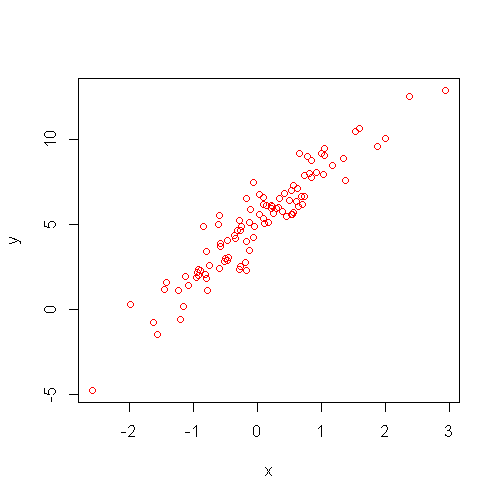

In [1]:
options(repr.plot.width = 5, repr.plot.height = 5, repr.plot.res = 100)

df <- data.frame(x = rnorm(n = 100, mean = 0, sd = 1))
df$y <- 5 + 3*df$x + rnorm(n = 100, mean = 0, sd = 1)

plot(df, col = 'red')

Un modelo de regresión lineal utiliza el error cuadratico medio como métrica de pérdida para realizar el ajuste de parámetros

$$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

Recordemos que,

$$ \hat{y}_i = \beta_0 + \beta_1 x_i $$

$$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - (\beta_0 + \beta_1 x_i))^2 $$

Lo que nos deja la siguiente expresión al realizar una sustitución

$$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \beta_0 - \beta_1 x_i)^2 $$

Aplicando derivada del MSE respecto a $\beta_1$ y $\beta_0$ tenemos lo siguiente,

$$ \frac{\partial MSE}{\partial \beta_1}: \frac{-2}{n}\sum_{i=1}^{n} (y_i x_i - \beta_0 x_i - \beta_1 x_i^2) = D_{\beta_1} $$

$$ \frac{\partial MSE}{\partial \beta_0}: \frac{-2}{n}\sum_{i=1}^{n} (y_i - \beta_0 - \beta_1 x_i) = D_{\beta_0} $$

Con lo anterior podemos escribir nuestra función de actualización,

$$ \beta_{1} = \beta_{1} - \alpha \times D_{\beta_1} $$

$$ \beta_{0} = \beta_0 - \alpha \times D_{\beta_0} $$

En lo anterior $\alpha$ representa la tasa de aprendizaje (learning rate)

In [34]:
alpha = 0.01
epocas = 200
n = nrow(df)

beta_1 = 0
beta_0 = 0
betas_0 = vector('numeric', epocas)
betas_1 = vector('numeric', epocas)

for (i in 1:epocas){
    D_b_0 = (-2 / n) * sum(df$y * df$x - beta_0*df$x - beta_1 * df$x**2)
    D_b_1 = (-2 / n) * sum(df$y - beta_0 - beta_1 * df$x)
    beta_1 = beta_1 - alpha * D_b_0
    beta_0 = beta_0 - alpha * D_b_1
    betas_1[i] = beta_1
    betas_0[i] = beta_0
}

In [35]:
print(beta_1)
print(beta_0)

[1] 2.978183
[1] 4.931218


Podemos visualizar cómo fue el proceso de ajuste de los valores de $\beta_0$ y $\beta_1$ durante la aplicación del algoritmo

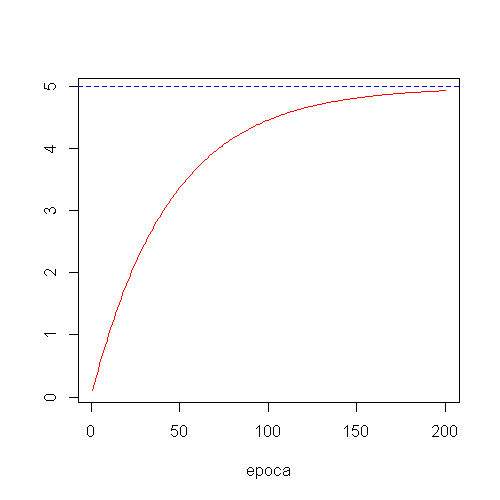

In [45]:
plot(betas_0, type = 'l', col = 'red', ylab = '', xlab = 'epoca')
abline(h = 5, lty = 'dashed', col = 'blue')

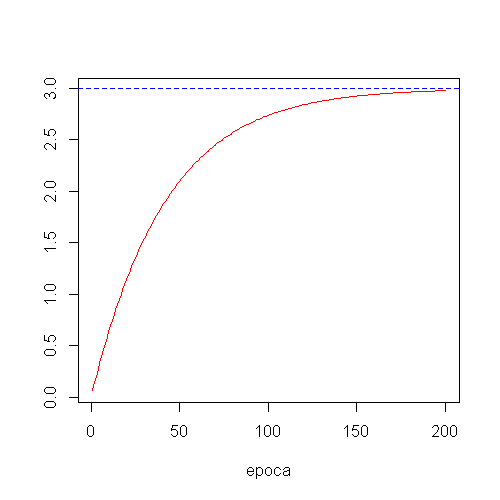

In [46]:
plot(betas_1, type = 'l', col = 'red', ylab = '', xlab = 'epoca')
abline(h = 3, lty = 'dashed', col = 'blue')

In [ ]:
require(ggplot2)
require(dplyr)

In [2]:
setwd('ruta') # Acá defines la ruta en que trabajarás las imágenes
list.files()

[1] "myanimation.gif"

In [ ]:
# Este loop guarda cada uno de los objetos "gg" en el directorio fijado a través de ggsave
for (i in 1:epocas){
  gg <- df %>%
    ggplot(aes(x = x, y = y)) +
    geom_abline(slope = betas_1[i], intercept = betas_0[i], col = 'blue', size = 1.5, linetype = 'dashed') +
    geom_point(size = 3, col = 'red') +
    theme_bw() +
    xlab('X') +
    ylab('Y') +
    ggtitle(paste0('Intercepto: ', round(betas_0[i], 2), ' - Pendiente: ', round(betas_1[i], 2))) +
    theme(axis.text.x = element_text(size = 20),
          axis.text.y = element_text(size = 20),
          axis.title.x = element_text(size = 20),
          axis.title.y = element_text(size = 20))
  ggsave(sprintf("myplot%03d.png", i), gg)
}

# Leemos todos los archivos que tengan este nombre
png_files <- Sys.glob("myplot*.png")

# Paquete para hacer el GIF
require(gifski)

# Generamos el GIF
gifski(
  png_files,
  "myanimation.gif",
  width = 400, height = 400, # Tamaño
  delay = 1/5 # Tasa
)
file.remove(png_files) # removemos los archivos png guardados

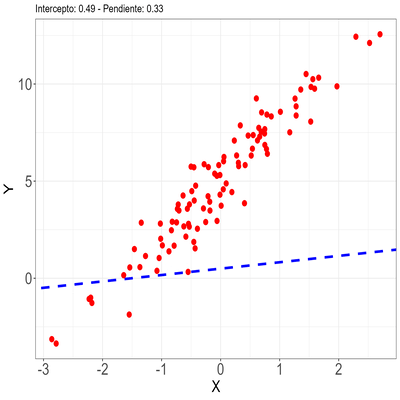

In [11]:
require("IRdisplay")
display_png(file='myanimation.gif')  